In [2]:
from pathlib import Path
import pandas as pd
from src.pipeline.topicmodelling import LDAEngine
from src.pipeline.preprocessing import TextCorpusPreprocessor

In [3]:
ROOT = Path().resolve().parent
DATA = ROOT / "data"
OUTPUT = ROOT / "output"
ARTICLES = DATA / "example_dataset"
EXCLUSION_LIST = DATA / "exclusion_list.txt"
ABBREVIATION_LIST = DATA / "abbreviation_list.txt"

## 1. Preprocessing

### 1.1. Load Articles

In [5]:
preprocessor = TextCorpusPreprocessor(ARTICLES, EXCLUSION_LIST)
preprocessor

100%|██████████| 1/1 [00:00<00:00,  4.33it/s]


TextCorpusPreprocessor instance with 2868 articles.

### 1.2. Lower case and Punctuation

In [6]:
preprocessor.convert_to_lower_case()
preprocessor.remove_punctuation()

### 1.3. Remove Stop-words

In [7]:
preprocessor.remove_stop_words()

### 1.4. Mark bigrams

In [8]:
preprocessor.mark_n_grams()

Creating n-gram candidates...


100%|██████████| 2868/2868 [00:01<00:00, 1698.52it/s]


Counting occurrences...
Based on an occurrence threshold of 50, 149 of possible 425629 n-grams have been kept.


### 1.5. Relace abbreviations

In [9]:
preprocessor.replace_abbreviations(ABBREVIATION_LIST)

### 1.6. Lemmatization

In [ ]:
preprocessor.lemmatize_texts()

### 1.7. Remove Infrequent Words

In [14]:
preprocessor.remove_infrequent_words(inplace=True, tolerance=0.005)

### 1.8. Save Result

In [15]:
preprocessor.export_json(DATA / "preprocessed_example_articles.json")

## 2. LDA Workflow

In [19]:
lda_engine = LDAEngine(DATA / "preprocessed_example_articles.json")

### 2.1. Number of Topics

100%|██████████| 8/8 [01:11<00:00,  8.92s/it]


Topic number
10   -1.268727
15   -1.286688
20   -1.799377
25   -1.711481
30   -1.992681
35   -1.983543
40   -2.018375
45   -2.326598
Name: U-Mass Coherence, dtype: float64

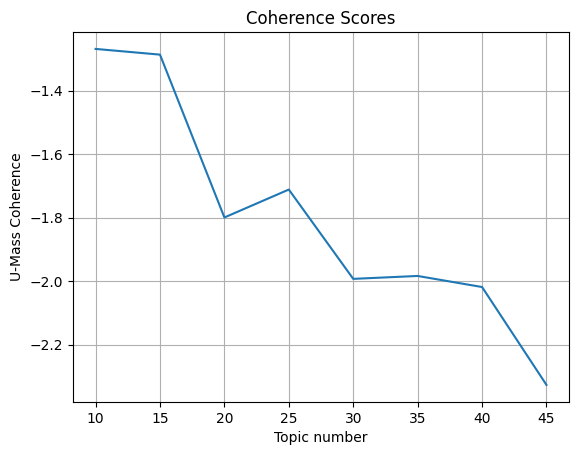

In [20]:
lda_engine.evaluate_umass_coherence()

100%|██████████| 6/6 [00:53<00:00,  8.84s/it]


Topic number
22   -1.644794
23   -1.523505
24   -1.883344
25   -1.473030
26   -1.720242
27   -1.713838
Name: U-Mass Coherence, dtype: float64

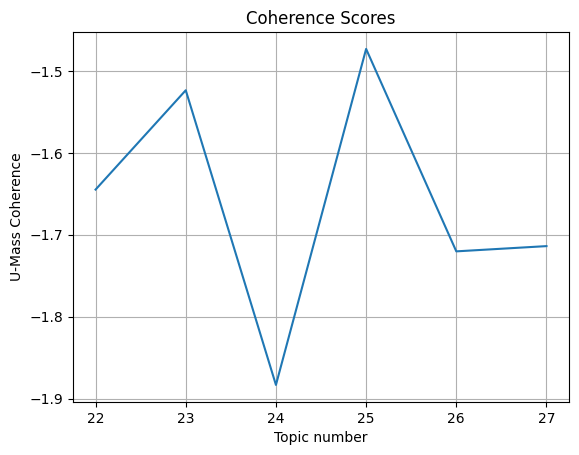

In [21]:
lda_engine.evaluate_umass_coherence((22, 28, 1))

### 2.2. Train Model

In [23]:
lda_engine.initialise_model(n_topics=25)

Iteration: 100%|██████████| 1000/1000 [00:07<00:00, 128.24it/s, LLPW: -8.550472]


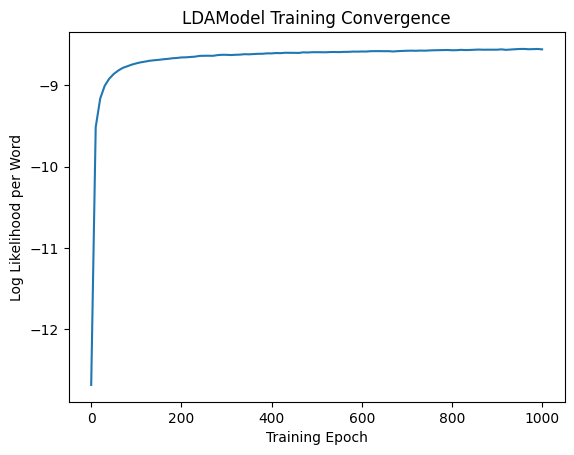

In [24]:
lda_engine.train()

### 2.3. Label Topics

#### 2.3.1. Automatic Labelling

In [25]:
lda_engine.label_topics_with_llm()

Device set to use mps:0
  0%|          | 0/25 [00:00<?, ?it/s]/Users/paulrusing/Library/Caches/pypoetry/virtualenvs/241212_git_project-R8QXZlZh-py3.10/lib/python3.10/site-packages/transformers/pytorch_utils.py:332: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test_elements = torch.tensor(test_elements)
  4%|▍         | 1/25 [00:03<01:27,  3.64s/it]

Assigned pandemic for 'care', 'telemedicine', 'telehealth', 'services', 'patients', 'pandemic', 'health', 'service'!


  8%|▊         | 2/25 [00:04<00:42,  1.87s/it]

Assigned nurse for 'nurses', 'care', 'practice', 'nursing', 'role', 'health', 'healthcare', 'professional'!


 12%|█▏        | 3/25 [00:04<00:27,  1.25s/it]

Assigned robots for 'rehabilitation', 'stroke', 'train*', 'robot', 'robotic', 'robots', 'system', 'control'!


 16%|█▌        | 4/25 [00:05<00:22,  1.07s/it]

Assigned machine learning for 'model', 'models', 'machine_learning', 'accuracy', 'performance', 'data', 'methods', 'prediction'!


 20%|██        | 5/25 [00:06<00:18,  1.08it/s]

Assigned method for 'results', 'study', 'data', 'assessment', 'time', 'two', 'methods', 'test'!


 24%|██▍       | 6/25 [00:07<00:19,  1.05s/it]

Assigned psychiatry for 'cognitive', 'brain', 'perception', 'disease', 'associated', 'measures', 'relat*', 'patients'!


 28%|██▊       | 7/25 [00:08<00:16,  1.08it/s]

Assigned media for 'social', 'concept', 'media', 'knowledge', 'concepts', 'analysis', 'information', 'human'!


 32%|███▏      | 8/25 [00:09<00:15,  1.13it/s]

Assigned chatbot for 'chatgpt', 'questions', 'chatbots', 'llms', 'information', 'medical', 'chatbot', 'responses'!


 36%|███▌      | 9/25 [00:09<00:13,  1.23it/s]

Assigned research for 'studies', 'interventions', 'review', 'includ*', 'literature', 'search', 'evidence', 'articles'!


 40%|████      | 10/25 [00:10<00:10,  1.46it/s]

Assigned education for 'students', 'learn*', 'train*', 'medical', 'skills', 'education', 'teach*', 'knowledge'!


 44%|████▍     | 11/25 [00:10<00:08,  1.71it/s]

Assigned cancer for 'cancer', 'cell', 'cells', 'expression', 'molecular', 'drug', 'genes', 'role'!


 48%|████▊     | 12/25 [00:10<00:06,  1.93it/s]

Assigned health for 'support', 'care', 'qualitative', 'results', 'methods', 'study', 'interviews', 'ehealth'!


 52%|█████▏    | 13/25 [00:11<00:05,  2.10it/s]

Assigned brain for 'brain', 'pain', 'network', 'neural', 'visual', 'connectivity', 'model', 'dynamics'!


 56%|█████▌    | 14/25 [00:11<00:06,  1.77it/s]

Assigned children for 'diabetes', 'children', 'blood_pressure', 'control', 'parents', 'patients', 'hypertension', 'type_diabetes'!


 60%|██████    | 15/25 [00:12<00:06,  1.61it/s]

Assigned knee for 'surgery', 'surgical', 'patients', 'knee', 'surgeons', 'robotic', 'osteoarthritis', 'treatment'!


 64%|██████▍   | 16/25 [00:13<00:04,  1.82it/s]

Assigned telephone for 'patients', 'physicians', 'patient', 'medical', 'physician', 'information', 'telephone', 'consultation'!


 68%|██████▊   | 17/25 [00:13<00:05,  1.59it/s]

Assigned acute for 'patients', 'intensive_care_unit', 'intensive_care', 'unit', 'acute', 'sepsis', 'critical_care', 'critically'!


 72%|███████▏  | 18/25 [00:14<00:03,  1.80it/s]

Assigned survey for 'participants', 'survey', 'among', 'knowledge', 'perception', 'study', 'results', 'questionnaire'!


 76%|███████▌  | 19/25 [00:15<00:03,  1.61it/s]

Assigned obesity for 'women', 'physical_activity', 'weight', 'body_mass_index', 'abortion', 'obesity', 'weight_loss', 'cochlear_implant'!


 80%|████████  | 20/25 [00:15<00:02,  1.84it/s]

Assigned study for 'factors', 'self-efficacy', 'study', 'model', 'perceiv*', 'variables', 'analysis', 'behaviors'!


 84%|████████▍ | 21/25 [00:15<00:02,  1.96it/s]

Assigned medical for 'artificial_intelligence', 'clinical', 'systems', 'potential', 'research', 'medical', 'future', 'data'!


 88%|████████▊ | 22/25 [00:16<00:01,  1.93it/s]

Assigned heart failure for 'patients', 'disease', 'patient', 'care', 'heart_failure', 'management', 'treatment', 'chronic'!


 92%|█████████▏| 23/25 [00:16<00:00,  2.12it/s]

Assigned study for 'intervention', 'participants', 'self-efficacy', 'study', 'months', 'group', 'trial', 'program'!


 96%|█████████▌| 24/25 [00:17<00:00,  2.27it/s]

Assigned cancer for 'treatment', 'mental_health', 'symptoms', 'psychological', 'depression', 'cancer', 'interventions', 'disorders'!


100%|██████████| 25/25 [00:17<00:00,  1.43it/s]

Assigned app for 'health', 'information', 'mobile', 'mhealth', 'app', 'data', 'care', 'electronic_applications'!
Topic labels have been generated with hugging-face's google/flan-t5-large. It is recommended to evaluate those manually!
Additionally, consider running this validation prompt through another LLM:

Please see and optimise the following topic labels. The first word is the label that can be changed, the words behind it are input data belonging to that category. The first word has to match the rest. There may not be duplicates in the whole topic list.
Here are two examples:
'furniture': 'chair', 'table', 'couch', 'pillows'
'colors': 'black', 'yellow', 'green', 'blue'

 Here comes the list:
'pandemic': 'care', 'telemedicine', 'telehealth', 'services', 'patients', 'pandemic', 'health', 'service'
'nurse': 'nurses', 'care', 'practice', 'nursing', 'role', 'health', 'healthcare', 'professional'
'robots': 'rehabilitation', 'stroke', 'train*', 'robot', 'robotic', 'robots', 'system', 'co

#### 2.3.2. Chatbot Prompt for Validation

In [ ]:
for topic_ind, (topic, words) in enumerate(lda_engine.words_per_topic.iterrows()):
    print(topic_ind, topic)
    print(f"What topic accurately describes the words: {list(words)[:-1]}")

#### 2.3.2. Optimise Manually

In [ ]:
lda_engine.words_per_topic

In [ ]:
# lda_engine.topic_labels[0] = 'EXAMPLE'

### 2.4. Word Clouds and Word-per-Topics Distribution

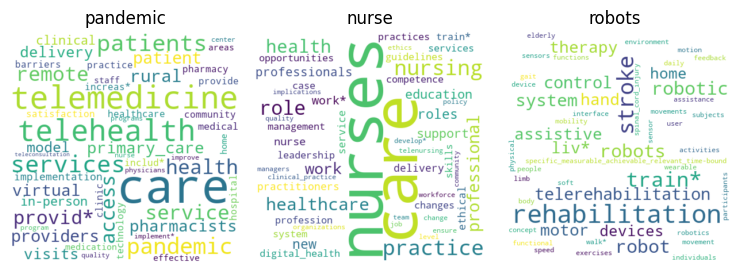

In [26]:
lda_engine.plot_word_clouds()

### 2.5. Topic Occurrences

In [27]:
lda_engine.topic_occurrences

,Occurrences,Label
Topic Number,,
20,383,medical
22,319,study
11,281,health
0,208,pandemic
3,171,machine learning
4,161,method
17,150,survey
1,136,nurse
9,110,education


### 2.6. Topic Network Graph

#### 2.6.1. Without Communities

In [ ]:
g, pos = lda_engine.plot_topic_graph(legend_cols=3, legend_pos=(.5, -.2), optimal_node_distance=3, hidden=True)
pos[20] = (-.2, -.2)
lda_engine.plot_topic_graph(g, pos, legend_cols=3, legend_pos=(.5, -.2), optimal_node_distance=3, save_dir=OUTPUT)

#### 2.6.2. With Communities

Community 0: [0, 1, 8, 9, 11, 15, 16, 17, 20, 24]
Community 1: [2, 3, 4, 5, 6, 7, 10, 12, 14]
Community 2: [13, 18, 19, 21, 22, 23]


(<networkx.classes.graph.Graph at 0x155499630>,
 {0: array([0.15368437, 0.70285915]),
  1: array([0.57010882, 0.19096813]),
  2: array([-0.70734075, -0.72964739]),
  3: array([-0.68101126,  0.0839361 ]),
  4: array([-0.04281316,  0.19594843]),
  5: array([-0.6100979 ,  0.88510626]),
  6: array([ 0.9396615 , -0.32143245]),
  7: array([-0.88286183, -0.46762567]),
  8: array([-0.6951193 ,  0.57090221]),
  9: array([ 0.40925983, -0.80217357]),
  10: array([ 0.59936162, -0.77340199]),
  11: array([ 0.19348965, -0.09626013]),
  12: array([0.36288778, 0.8600923 ]),
  13: array([-0.9403104 , -0.08509335]),
  14: array([ 0.1749351, -1.       ]),
  15: array([ 0.78307309, -0.50360298]),
  16: array([-0.30493775,  0.98670041]),
  17: array([0.89018846, 0.45752925]),
  18: array([-0.40112877, -0.92331688]),
  19: array([0.91318886, 0.00229068]),
  20: (-0.2, -0.2),
  21: array([-0.89881038,  0.56179806]),
  22: array([-0.31122992,  0.29852706]),
  23: array([0.512502  , 0.54731644]),
  24: array([

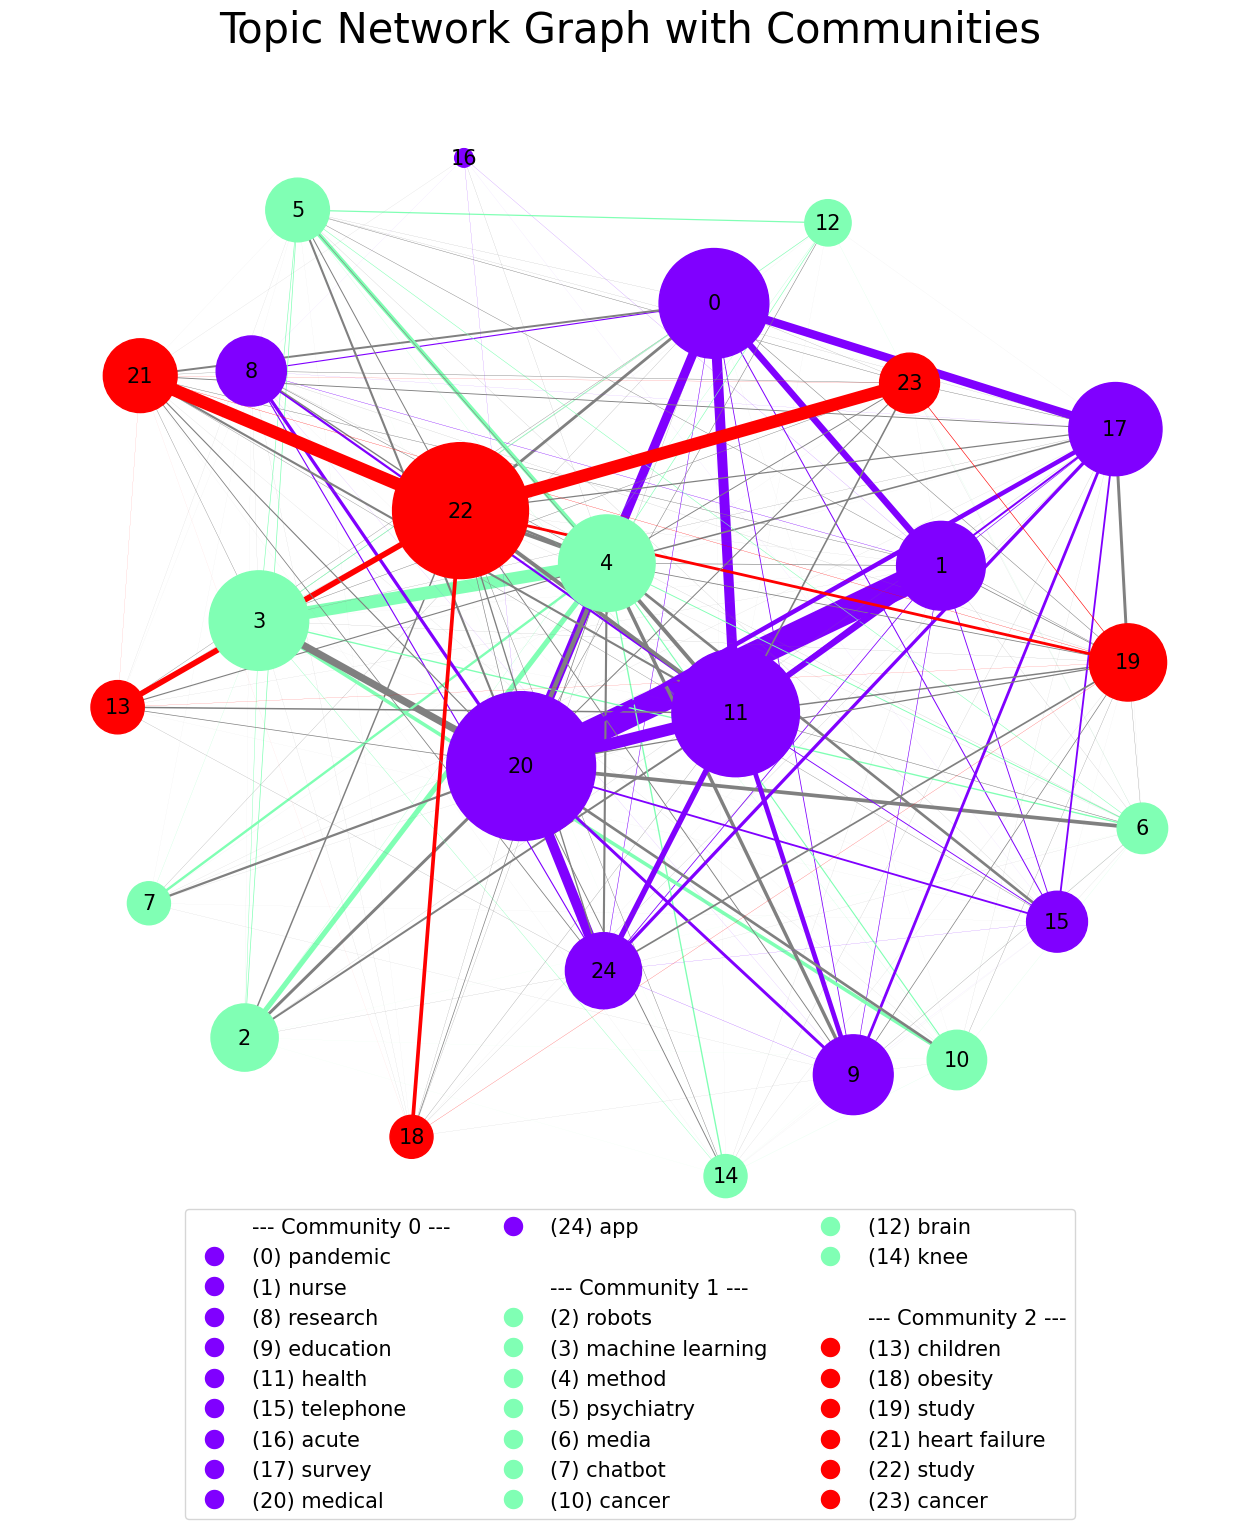

In [34]:
lda_engine.plot_topic_graph(g, pos, legend_cols=3, legend_pos=(.5, -.2), optimal_node_distance=3, save_dir=OUTPUT, community_algorithm='greedy')

#### 2.6.3. Time Slices

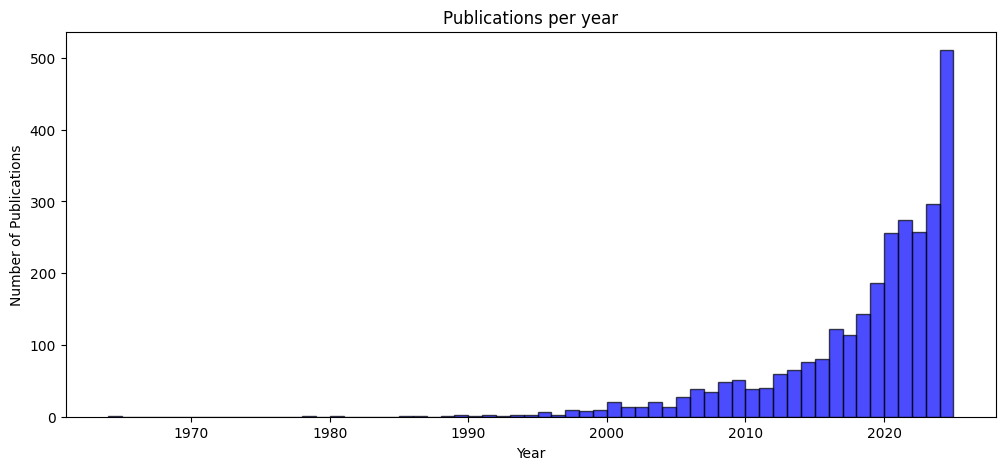

In [35]:
lda_engine.plot_publications_per_year()

Selected 375 from 2868 articles that were published until 2010!
Article subset with 375 articles provided. Parsing such to model...
Calculating (co)-occurrences...
This function returns a tuple with G (graph object) and pos (node position-dict).
It is recommended, to manually adjust the positions from the position-dict to improve the look of the plot.
Afterwards, the plot can be recreated with plot_topic_graph(G, pos)
Community 0: [0, 1, 2, 9, 10, 11, 20, 24]
Community 1: [3, 4, 5, 6, 7, 12, 14, 15, 17]
Community 2: [8, 13, 18, 19, 21, 22, 23]
Community 3: [16]


(<networkx.classes.graph.Graph at 0x153d7af80>,
 {0: array([0.13780618, 0.97860379]),
  1: array([0.94254413, 0.16738   ]),
  2: array([-0.54476104, -0.84653538]),
  3: array([-0.93846132,  0.26373576]),
  4: array([0.61783694, 0.70385925]),
  5: array([-0.61830609,  0.8469876 ]),
  6: array([ 0.95736426, -0.36545844]),
  7: array([-0.84123953, -0.49009227]),
  8: array([-0.62672881,  0.59933027]),
  9: array([ 0.40162416, -0.82841737]),
  10: array([ 0.64058365, -0.76736935]),
  11: array([-0.65187165, -0.64042676]),
  12: array([0.38323717, 0.85118631]),
  13: array([-0.91986077,  0.01772028]),
  14: array([ 0.24648688, -1.        ]),
  15: array([ 0.79378799, -0.53809133]),
  16: array([-0.32944751,  0.95791435]),
  17: array([0.91846896, 0.53462389]),
  18: array([-0.28811207, -0.96396045]),
  19: array([ 0.94212551, -0.0935101 ]),
  20: array([-0.91585742, -0.24590454]),
  21: array([-0.86978677,  0.54144883]),
  22: array([-0.10703171,  0.88815068]),
  23: array([0.69790333, 0.39

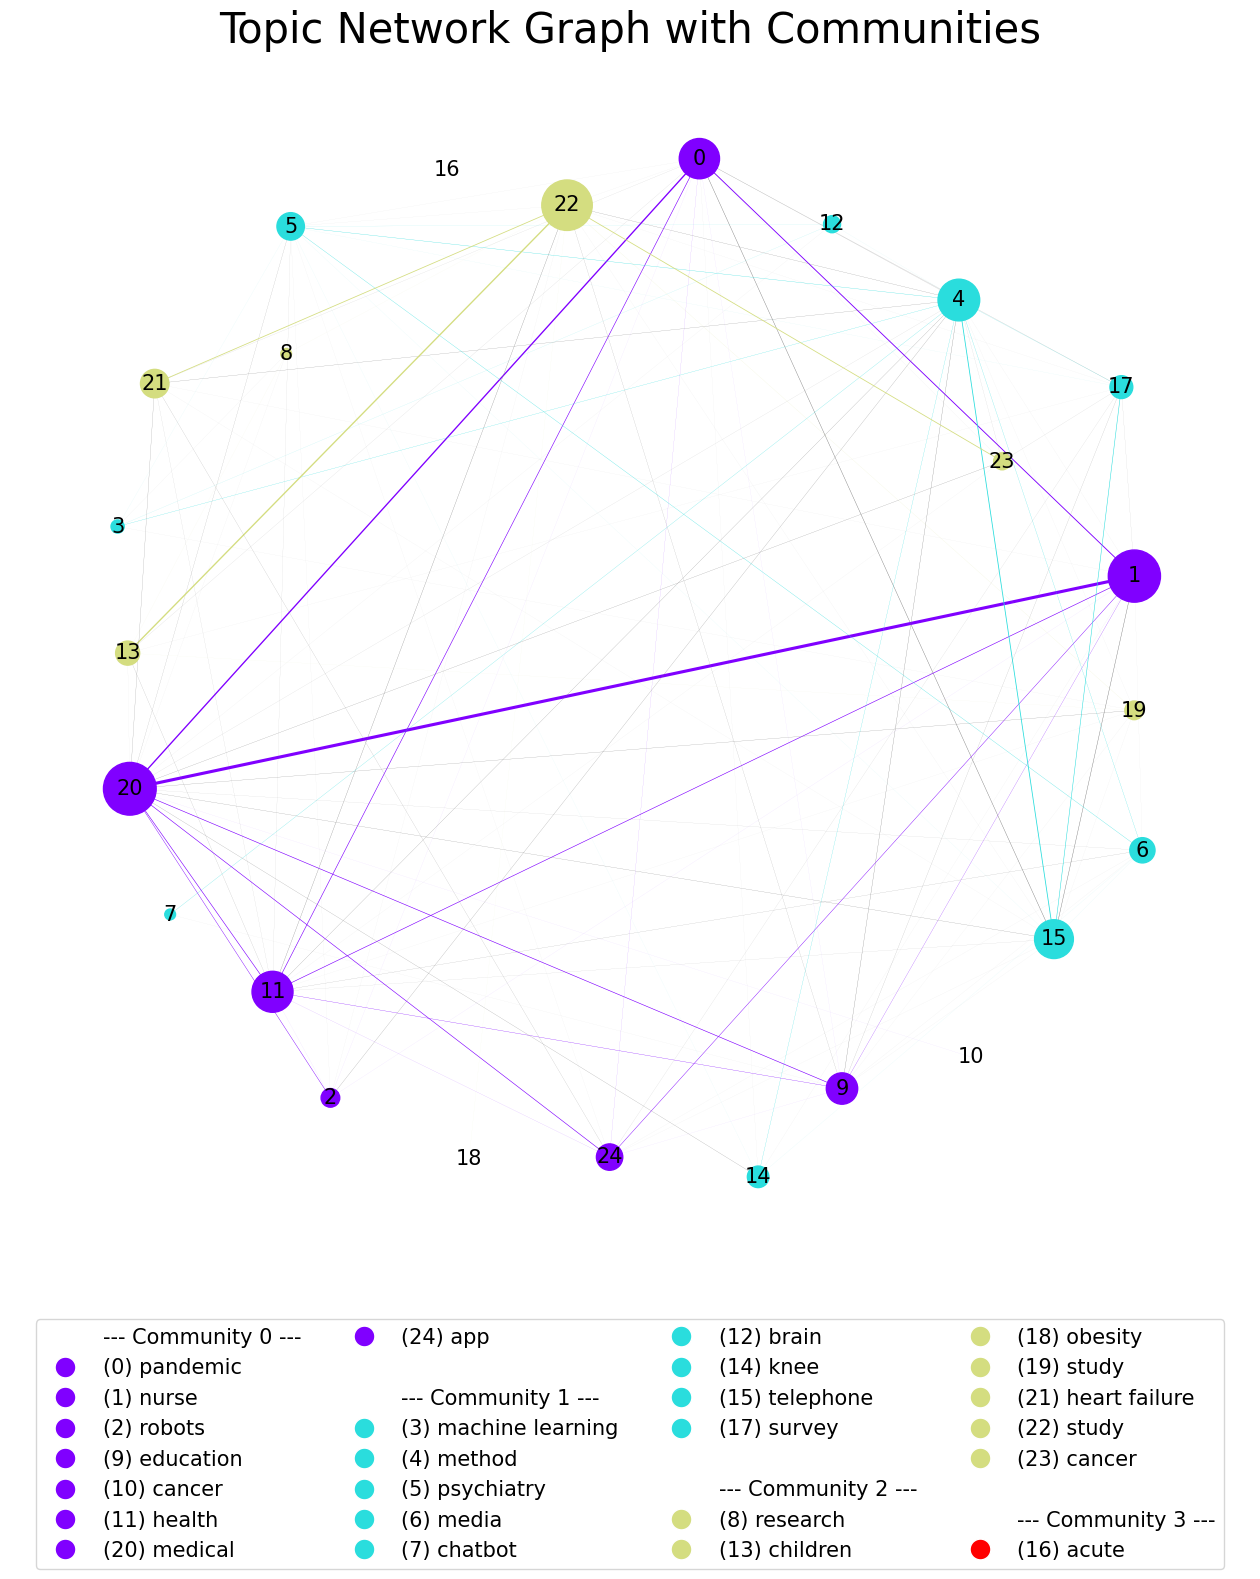

In [45]:
lda_engine.plot_topic_graph(time_slice=(None, 2010), legend_cols=4, legend_pos=(.5, -.24), optimal_node_distance=3, community_algorithm='greedy', save_dir=OUTPUT)

Selected 1181 from 2868 articles that were published from 2010 until 2020!
Article subset with 1181 articles provided. Parsing such to model...
Calculating (co)-occurrences...
This function returns a tuple with G (graph object) and pos (node position-dict).
It is recommended, to manually adjust the positions from the position-dict to improve the look of the plot.
Afterwards, the plot can be recreated with plot_topic_graph(G, pos)
Community 0: [0, 1, 6, 8, 11, 15, 16, 17, 20, 24]
Community 1: [2, 3, 4, 5, 7, 9, 10, 12, 14]
Community 2: [13, 18, 19, 21, 22, 23]


(<networkx.classes.graph.Graph at 0x153d7c1c0>,
 {0: array([0.04830505, 0.99325934]),
  1: array([0.92674038, 0.21447084]),
  2: array([-0.61276567, -0.80411084]),
  3: array([-0.95801187,  0.26622288]),
  4: array([0.38885562, 0.56487619]),
  5: array([-0.61891977,  0.86660947]),
  6: array([ 0.94709136, -0.36461004]),
  7: array([-0.85975059, -0.48649309]),
  8: array([-0.64594907,  0.60564648]),
  9: array([ 0.39850413, -0.82212255]),
  10: array([ 0.62717357, -0.76788364]),
  11: array([-0.32650789, -0.35496629]),
  12: array([0.34123611, 0.87264214]),
  13: array([-0.93623736, -0.00490207]),
  14: array([ 0.23077524, -1.        ]),
  15: array([ 0.77748979, -0.54433624]),
  16: array([-0.30940247,  0.97752206]),
  17: array([0.90889698, 0.54243425]),
  18: array([-0.33629841, -0.95075381]),
  19: array([ 0.93343184, -0.07865425]),
  20: array([-0.5049783 , -0.12755305]),
  21: array([-0.88119133,  0.56165728]),
  22: array([-0.1090526,  0.3393298]),
  23: array([0.64139234, 0.4599

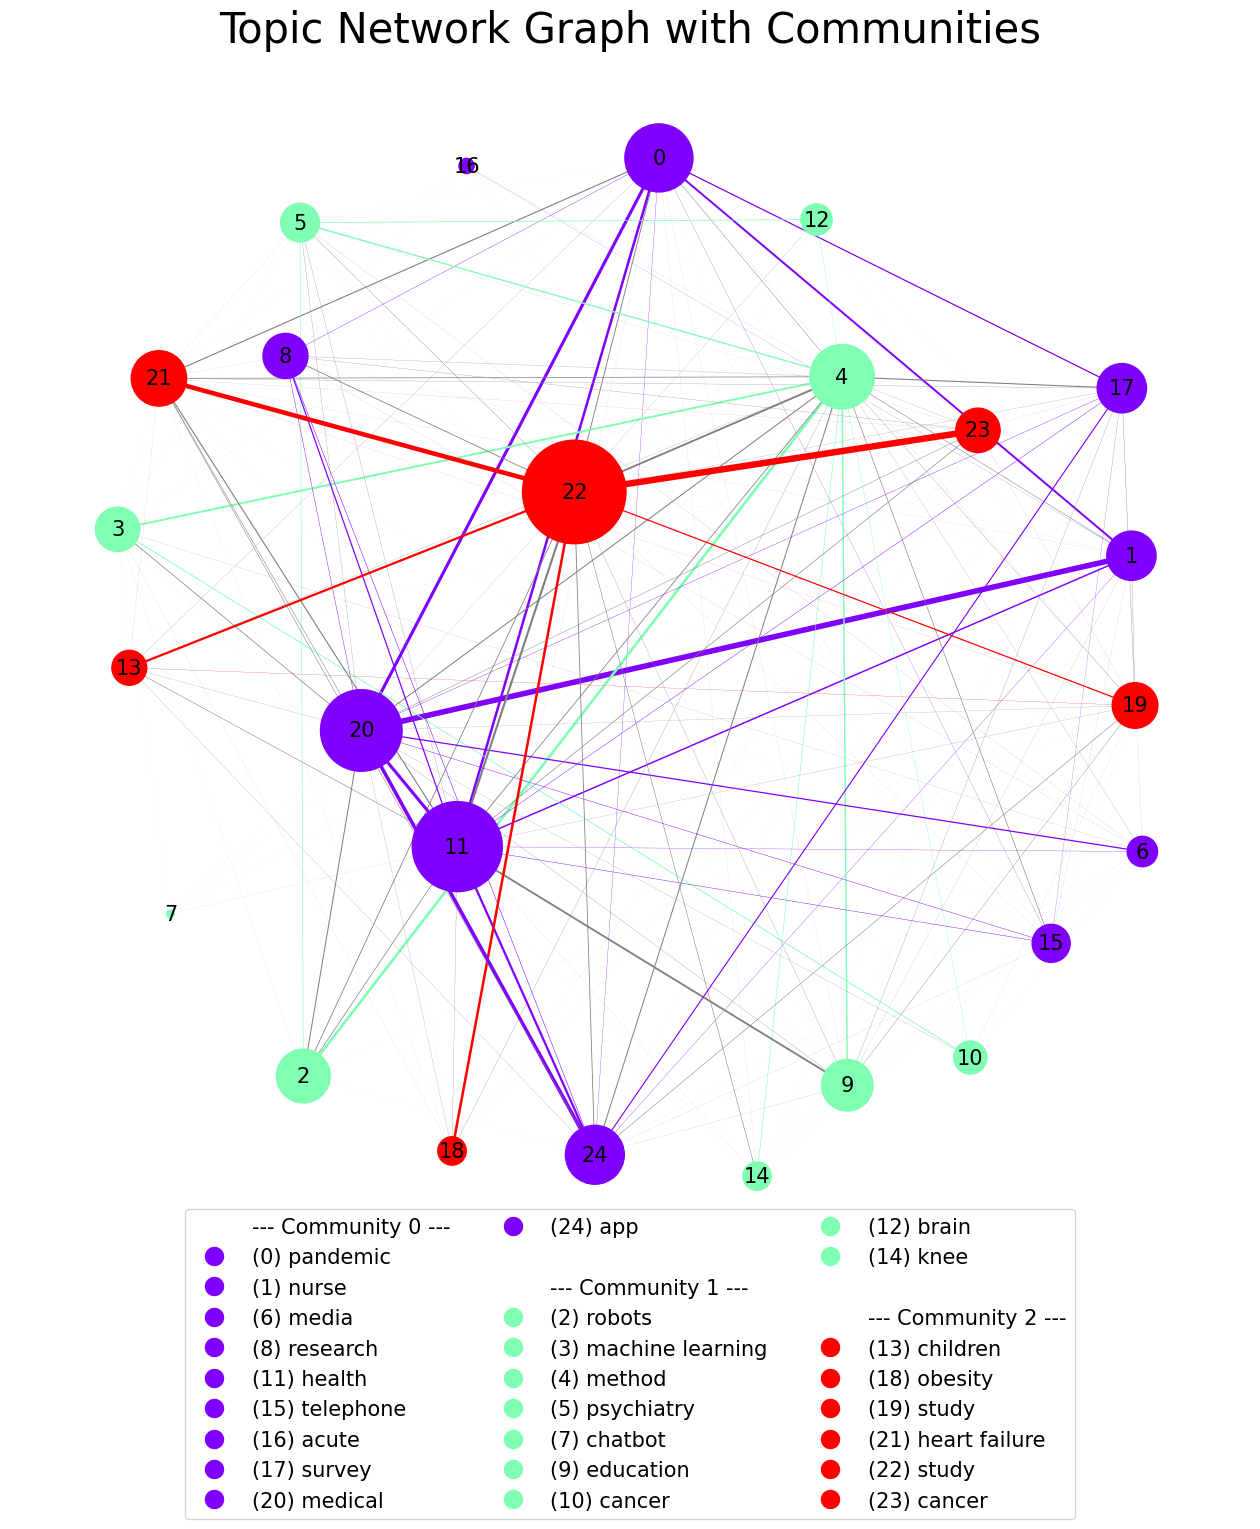

In [44]:
lda_engine.plot_topic_graph(time_slice=(2010, 2020), legend_cols=3, legend_pos=(.5, -.2), optimal_node_distance=3, community_algorithm='greedy', save_dir=OUTPUT)

Selected 1594 from 2868 articles that were published from 2020!
Article subset with 1594 articles provided. Parsing such to model...
Calculating (co)-occurrences...
This function returns a tuple with G (graph object) and pos (node position-dict).
It is recommended, to manually adjust the positions from the position-dict to improve the look of the plot.
Afterwards, the plot can be recreated with plot_topic_graph(G, pos)
Community 0: [0, 1, 8, 9, 11, 15, 16, 17, 20, 24]
Community 1: [2, 3, 4, 5, 6, 7, 10, 12, 14]
Community 2: [13, 18, 19, 21, 22, 23]


(<networkx.classes.graph.Graph at 0x153d7c130>,
 {0: array([0.14471918, 0.93126368]),
  1: array([0.88040726, 0.21524465]),
  2: array([-0.63026604, -0.79757756]),
  3: array([-0.75035899,  0.16085414]),
  4: array([0.14239613, 0.36367766]),
  5: array([-0.63436228,  0.82055072]),
  6: array([ 0.91161682, -0.36893851]),
  7: array([-0.86614855, -0.48108855]),
  8: array([-0.67134941,  0.54830193]),
  9: array([ 0.38315624, -0.81895735]),
  10: array([ 0.59376998, -0.7740909 ]),
  11: array([-0.19931208, -0.2566831 ]),
  12: array([0.35744168, 0.81234153]),
  13: array([-0.92885521, -0.06132357]),
  14: array([ 0.20243958, -1.        ]),
  15: array([ 0.75055458, -0.54199718]),
  16: array([-0.35792971,  0.92545688]),
  17: array([0.84589959, 0.54791709]),
  18: array([-0.35062873, -0.94827375]),
  19: array([ 0.89641933, -0.07773376]),
  20: array([-0.25892008, -0.04318903]),
  21: array([-0.88027126,  0.52676631]),
  22: array([-0.12530041,  0.85809194]),
  23: array([0.61367005, 0.41

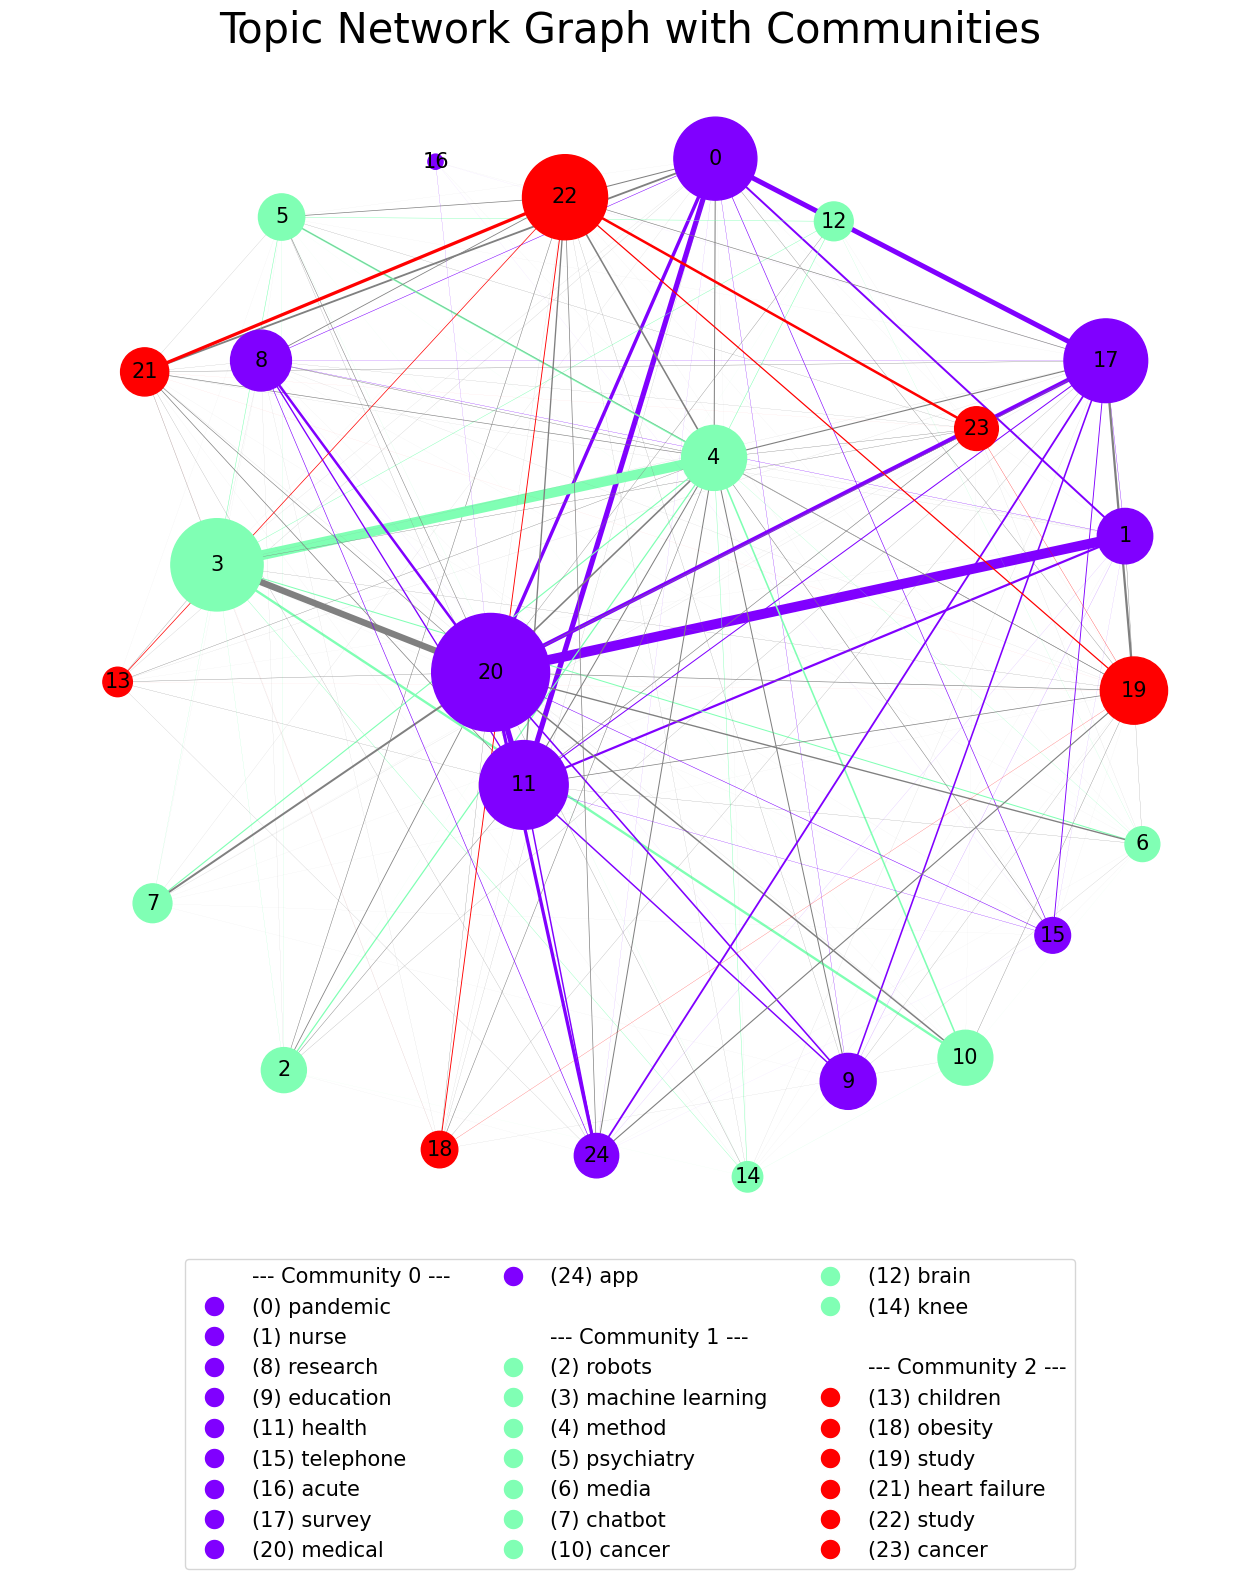

In [43]:
lda_engine.plot_topic_graph(time_slice=(2020, None), legend_cols=3, legend_pos=(.5, -.24), optimal_node_distance=3, community_algorithm='greedy', save_dir=OUTPUT)

## 2.7. Disciplinary Background

In [ ]:
topic_discipline_frame = lda_engine.get_topic_discipline_occurrences()
topic_discipline_frame